In [1]:
import pandas as pd
df_train = pd.read_csv('../data/data_train.csv')
df_test = pd.read_csv('../data/data_test.csv')
df_train.head()

,occupation,category,name,article
0,aviators,0,Aaron_Buerge,aaron grant buerg born april 1974 unit state a...
1,aviators,0,Adam_Housley,arthur adam housley born august 1971 emmi awar...
2,aviators,0,Aida_de_Acosta,aida acosta root breckinridg juli 1884 1962 am...
3,aviators,0,Albert_Scott_Crossfield,albert scott crossfield octob 1921 april 2006 ...
4,aviators,0,Alex_Henshaw,alexand adolphu dumfri henshaw postnomin count...


In [2]:
category_id_df = df_train[['occupation', 'category']].drop_duplicates().sort_values('category')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category', 'occupation']].values)
df_train.head()

,occupation,category,name,article
0,aviators,0,Aaron_Buerge,aaron grant buerg born april 1974 unit state a...
1,aviators,0,Adam_Housley,arthur adam housley born august 1971 emmi awar...
2,aviators,0,Aida_de_Acosta,aida acosta root breckinridg juli 1884 1962 am...
3,aviators,0,Albert_Scott_Crossfield,albert scott crossfield octob 1921 april 2006 ...
4,aviators,0,Alex_Henshaw,alexand adolphu dumfri henshaw postnomin count...


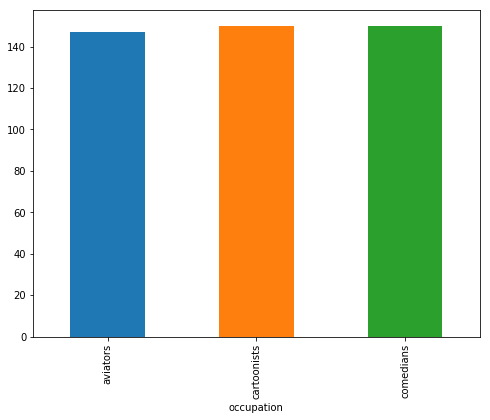

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_train.groupby('occupation').article.count().plot.bar(ylim=0)
plt.show()

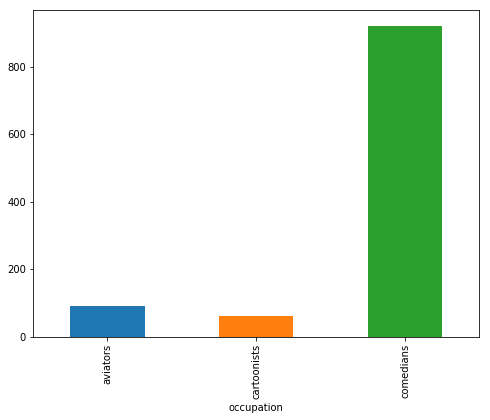

In [5]:
fig = plt.figure(figsize=(8,6))
df_test.groupby('occupation').article.count().plot.bar(ylim=0)
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_train.article.values.astype('U')).toarray()
labels = df_train.category
features.shape

(450, 7784)

In [13]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for occupation, category in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(occupation))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'aviators':
  . Most correlated unigrams:
. aircraft
. aviat
  . Most correlated bigrams:
. test pilot
. pilot licens
# 'cartoonists':
  . Most correlated unigrams:
. strip
. cartoonist
  . Most correlated bigrams:
. comic book
. comic strip
# 'comedians':
  . Most correlated unigrams:
. comedian
. comedi
  . Most correlated bigrams:
. standup comedi
. standup comedian


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df_train['article'], df_train['occupation'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.values.astype('U'))
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [15]:
data = [df_test.article[50]]
print("Name: ",df_test.name[50])
print("Occupation: ",clf.predict(count_vect.transform(data)))
data = [df_test.article[100]]
print("Name: ",df_test.name[100])
print("Occupation: ",clf.predict(count_vect.transform(data)))
data = [df_test.article[1020]]
print("Name: ",df_test.name[1020])
print("Occupation: ",clf.predict(count_vect.transform(data)))

Name:  Roland_Garros
Occupation:  ['aviators']
Name:  Charles_Chic_Sale
Occupation:  ['comedians']
Name:  Peyo
Occupation:  ['cartoonists']


In [16]:
data = """Ted Key (born Theodore Keyser; August 25, 1912 – May 3, 2008),
was an United States American cartoonist and writer.  He is best known as the creator of the cartoon panel Hazel (comic strip) Hazel, which was later the basis for a Hazel (TV series) television series of the same name, and also the creator of Mister Peabody Peabodys Improbable History. 

==College to cartoons==
Born in Fresno, California, Key was the son of Latvian immigrant Simon Keyser, who had changed his name from Katseff to Keyser, and then to "Key" during World War I.
"""
print(data)
print("Occupation: ",clf.predict(count_vect.transform([data])))

Ted Key (born Theodore Keyser; August 25, 1912 – May 3, 2008),
was an United States American cartoonist and writer.  He is best known as the creator of the cartoon panel Hazel (comic strip) Hazel, which was later the basis for a Hazel (TV series) television series of the same name, and also the creator of Mister Peabody Peabodys Improbable History. 

==College to cartoons==
Born in Fresno, California, Key was the son of Latvian immigrant Simon Keyser, who had changed his name from Katseff to Keyser, and then to "Key" during World War I.

Occupation:  ['cartoonists']


c:\users\shrey\desktop\people-occupations-classifier\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\shrey\desktop\people-occupations-classifier\venv\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\shrey\desktop\people-occupations-classifier\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\shrey\desktop\people-occupations-classifier\venv\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this 

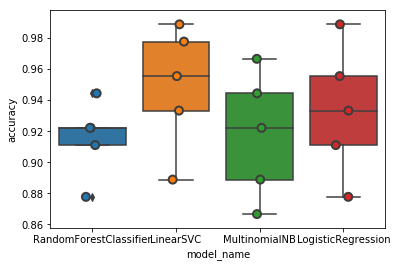

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [20]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.948889
LogisticRegression        0.933333
MultinomialNB             0.917778
RandomForestClassifier    0.915556
Name: accuracy, dtype: float64

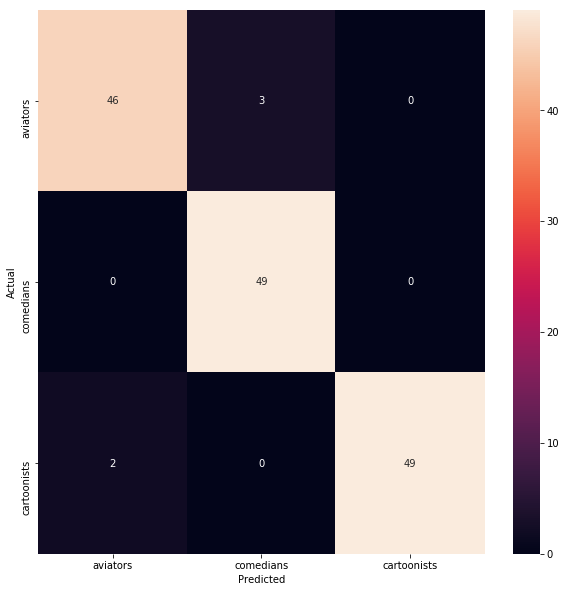

In [26]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_train.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.occupation.values, yticklabels=category_id_df.occupation.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [28]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df_train['occupation'].unique()))

              precision    recall  f1-score   support

    aviators       0.96      0.94      0.95        49
   comedians       0.94      1.00      0.97        49
 cartoonists       1.00      0.96      0.98        51

   micro avg       0.97      0.97      0.97       149
   macro avg       0.97      0.97      0.97       149
weighted avg       0.97      0.97      0.97       149

